# MA 576 Optimization for Data Science - Homework 5
#### Nicolas Jorquera

## Problem 1

Consider a discrete random variable \textit{X} that takes values $z_1, z_2, ... z_n$ with probabilities $p_1, p_2, ... p_n$ such that $p_i \leq 0$ and $\sum_i p_i = 1$. Find the minimizer $x^*$ of the function $f(x) = \mathbf{E}[(X-x)^2]$. \\

We know that $\mathbf{E}(x) = \mu = \sum_{i=1} p_iz_i .$ Therefore $\frac{\partial }{\partial x} \mathbf{E}(X-x)^2 = p_1(z_1 - x)^2 + p_2(z_2 - x)^2 + ... p_n(z_n - x)^2$. We can take the derivative and set it equal to 0 to find the minimum. When we simplify this equation we get: 
\begin{align*}
    x^* =   \mathbf{E}(x) = \sum_{i=1} p_iz_i
\end{align*}

- This also makes sense intuitively since the minimizer would be the mean, since it would make the function closer to the center

## Problem 2

Consider the problem
\begin{align*}
    \text{minimize} \frac{1}{2} \|Ax-b\|^2_2,
\end{align*}
where $A \in \mathbf{R}^{mxn}$, $b \in \mathbf{R}^{m}$,  $x \in \mathbf{R}^{n}$. 

**PART 1** - Write the optimality condition for this problem. Express and compute the exact solution $x^*$.

   \begin{align*}
        f(x) = \frac{1}{2} \|Ax-b\|^2_2 \\
        \nabla f(x) = A^T(Ax-b) \\
        x^* = (A^TA)^{-1}A^Tb
    \end{align*}

**PART 2** - Starting from $x^0 = (0,0,...0)^T, $, use the steepest descent method to find an approximate solution. Use the following stepsizes: a) ***fixed step***, $\frac{1}{\lambda_{max}(A^TA)}$, b) ***exact line search***, c) ***Armijo’s rule***.  

The **steepest descent method** is an iterative method to find an approximate solution to the given problem. It starts with an initial guess x^0 and follows the negative gradient of the objective function. 
- We will then apply the steepest descent method with different step sizes (alpha), and iterate until convergence or a maximum number of iterations is reached. We will then compare the approximate solutions obtained by the steepest descent method with different step sizes to the exact solution x* by plotting them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load matrix A from file A.txt
with open('A.txt', 'r') as file:
    A_str = file.read()
A = np.array([[float(num) for num in row.split(',')] for row in A_str.strip().split('\n')])

# Load vector b from file b.txt
with open('b.txt', 'r') as file:
    b_str = file.read()
b = np.array([float(num) for num in b_str.strip().split('\n')])

# Save dimensionality of data
m, n = A.shape[0], A.shape[1]

b = b.reshape(m,1) #Was given errors since shape was (30,) instead of (30,1)

- Exact Solution calculations were provided in HW. Objective function was provided.

In [2]:
# Gradient of the objective function#
def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b)**2

#Gradient of the objective function
def grad_f(x, A, b):
    return A.T @ (A @ x - b)

# Exact solution
def exact_solution(A, b):
    return np.linalg.inv(A.T @ A) @ (A.T @ b)

There are various advantages and disadvantages when choosing the **step size** that will be explored in the plots below. When α = 1/λ_max(A^T A), it is a constant step size; and is easy to compute since it doesn't require additional computations at each iteration. However both Armijo Rule and and Line Search changes the stp size at each iteration, which in theory should make it converge faster. 

In [3]:
f1 = lambda x: 1/2 * np.linalg.norm(A @ x - b)**2

# Step sizes
alpha_a = 1 / np.linalg.eigvalsh(A.T @ A).max()

# Line search
def line_search(x, grad):
    alpha = 1
    c = 1e-4
    while f1(x - alpha * grad) > f1(x) - c * alpha * np.dot(grad.T, grad):
        alpha *= 0.5
    return alpha

# Armijo's 
def armijo_rule(x, grad):
    alpha = 1
    c = 1e-4
    beta = 0.5
    while f1(x - alpha * grad) > f1(x) - c * alpha * np.dot(grad.T, grad):
        alpha *= beta
    return alpha

The **steepest descent method** is an iterative method for minimizing a function. It involves the following steps:
1.	Initialize x0
2.	Update x^k+1 = x^k - α * ∇f(x^k), where α is the step size.
3.	In the case of this problem we are given three different step sizes, so the alpha choice needs to be specified. 

In [4]:
# Steepest descent algorithm
def steepest_descent(A, b, x0, alpha_choice, epsilon, max_iter=1000):
    x = x0
    x_star = np.linalg.solve(A.T @ A, A.T @ b)
    k = 0
    grad_norms = []
    relative_errors = []
    errors = []
    stepsizes = []

    for k in range(max_iter):

        gradient = grad_f(x, A, b)
        
        if alpha_choice == 'line_search':
            alpha = line_search(x, gradient)
        elif alpha_choice == 'armijo':
            alpha = armijo_rule(x, gradient)
        else:
            alpha = alpha_a
        
        grad_norm = np.linalg.norm(gradient)
        rel_error = np.linalg.norm(x_star - x) / np.linalg.norm(x_star)
        error = np.abs(f(x_star, A, b) - f(x, A, b))
        
        grad_norms.append(grad_norm)
        relative_errors.append(rel_error)
        errors.append(error)
        stepsizes.append(alpha)
        
        x = x - alpha * gradient
        k += 1
        
    return x, grad_norms, relative_errors, errors, stepsizes

Initialize x0. Then use the steepest descent method with different step sizes to see how they differ:

In [5]:
x0 = np.zeros(n).reshape(n,1)
epsilon = 1e-4

x_a, grad_norms_a, rel_errors_a, errors_a, stepsizes_a = steepest_descent(A, b, x0, 'fixed', epsilon)
x_b, grad_norms_b, rel_errors_b, errors_b, stepsizes_b  = steepest_descent(A, b, x0, 'line_search', epsilon)
x_c, grad_norms_c, rel_errors_c, errors_c, stepsizes_c  = steepest_descent(A, b, x0, 'armijo', epsilon)

Plotting differences between step sizes:

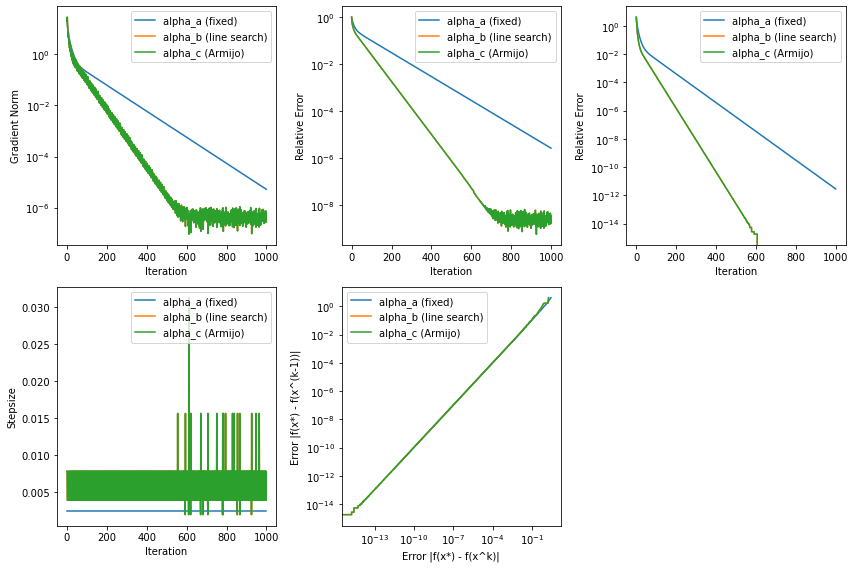

In [6]:
# Plotting
plt.figure(figsize=(12,8))

# Gradient norm vs iteration number
plt.subplot(231)
plt.plot(grad_norms_a, label='alpha_a (fixed)')
plt.plot(grad_norms_b, label='alpha_b (line search)')
plt.plot(grad_norms_c, label='alpha_c (Armijo)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.yscale('log')
plt.legend()

# Relative error vs iteration number
plt.subplot(232)
plt.plot(rel_errors_a, label='alpha_a (fixed)')
plt.plot(rel_errors_b, label='alpha_b (line search)')
plt.plot(rel_errors_c, label='alpha_c (Armijo)')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()

# Error |f(x*) - f(x^k)| vs iteration number
plt.subplot(233)
plt.plot(errors_a, label='alpha_a (fixed)')
plt.plot(errors_b, label='alpha_b (line search)')
plt.plot(errors_c, label='alpha_c (Armijo)')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()


# Stepsize vs iteration number
plt.subplot(234)
plt.plot(stepsizes_a, label='alpha_a (fixed)')
plt.plot(stepsizes_b, label='alpha_b (line search)')
plt.plot(stepsizes_c, label='alpha_c (Armijo)')
plt.xlabel('Iteration')
plt.ylabel('Stepsize')
plt.legend()

# Error |f(x*) - f(x^k)| vs Error |f(x*) - f(x^(k-1))|
plt.subplot(235)
plt.plot(errors_a[1:], errors_a[:-1], label='alpha_a (fixed)')
plt.plot(errors_b[1:], errors_b[:-1], label='alpha_b (line search)')
plt.plot(errors_c[1:], errors_c[:-1], label='alpha_c (Armijo)')
plt.xlabel('Error |f(x*) - f(x^k)|')
plt.ylabel('Error |f(x*) - f(x^(k-1))|')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Observations**
- ***Gradient norm plot:** The adaptive step sizes (line search and Armijo's rule) show faster decrease in the gradient norm (as expected) compared to the constant step size, indicating faster convergence.
- **Relative error plot:** The adaptive step sizes show a faster decrease in the relative error compared to the constant step size.
- **Error |f(x*) - f(x^k)| plot:** The adaptive step sizes show a faster decrease in the error compared to the constant step size.
- **Stepsize plot:** The constant step size has a flat line (expected), while the adaptive step sizes (line search and Armijo's rule) show varying step sizes at each iteration.
- **Error |f(x*) - f(x^k)| vs Error |f(x*) - f(x^(k-1))| plot:**  All three show a relative similar convergence properties.

*However because both adaptive step sizes performed relatively similar, I will graph both the fixed line search against the adaptive line search to demonstrate this*

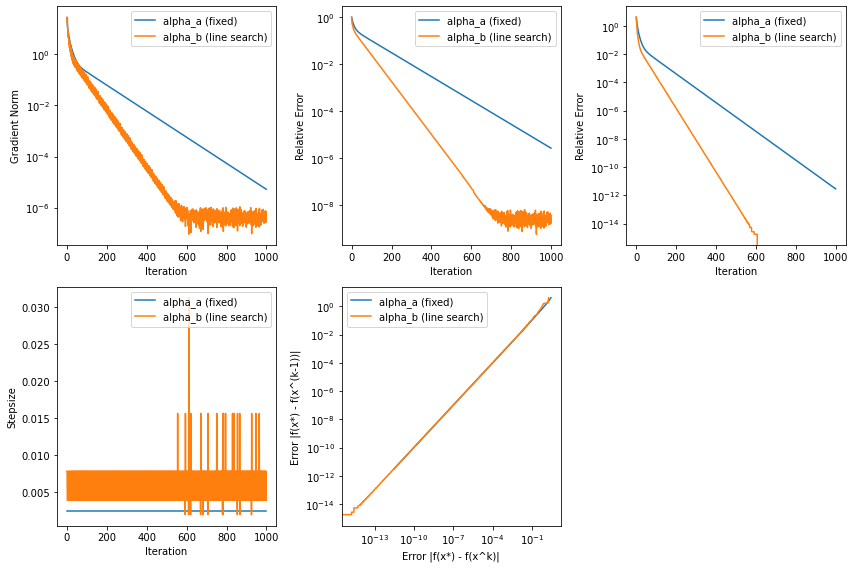

In [7]:
# Plotting
plt.figure(figsize=(12,8))

# Gradient norm vs iteration number
plt.subplot(231)
plt.plot(grad_norms_a, label='alpha_a (fixed)')
plt.plot(grad_norms_b, label='alpha_b (line search)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.yscale('log')
plt.legend()

# Relative error vs iteration number
plt.subplot(232)
plt.plot(rel_errors_a, label='alpha_a (fixed)')
plt.plot(rel_errors_b, label='alpha_b (line search)')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()

# Error |f(x*) - f(x^k)| vs iteration number
plt.subplot(233)
plt.plot(errors_a, label='alpha_a (fixed)')
plt.plot(errors_b, label='alpha_b (line search)')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()


# Stepsize vs iteration number
plt.subplot(234)
plt.plot(stepsizes_a, label='alpha_a (fixed)')
plt.plot(stepsizes_b, label='alpha_b (line search)')
plt.xlabel('Iteration')
plt.ylabel('Stepsize')
plt.legend()

# Error |f(x*) - f(x^k)| vs Error |f(x*) - f(x^(k-1))|
plt.subplot(235)
plt.plot(errors_a[1:], errors_a[:-1], label='alpha_a (fixed)')
plt.plot(errors_b[1:], errors_b[:-1], label='alpha_b (line search)')
plt.xlabel('Error |f(x*) - f(x^k)|')
plt.ylabel('Error |f(x*) - f(x^(k-1))|')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**PART 3** - Try different stopping conditions: a) $\| \nabla f(x^k) \| \geq \epsilon$, b) $\| x^* - x^k \| \geq \epsilon_0$, c) $|f(x^*) - f(x^k) \geq \epsilon_1$. Use $\epsilon = 10^{-4}$.

In [8]:
def steepest_descent2(A, b, x0, stopping_condition, epsilon, epsilon0=None, epsilon1=None, max_iter=1000):
    x = x0
    x_star = np.linalg.solve(A.T @ A, A.T @ b)
    k = 0
    grad_norms = []
    relative_errors = []
    errors = []
    stepsizes = []
    
    while k < max_iter:
        gradient = grad_f(x, A, b)
        grad_norm = np.linalg.norm(gradient)
        rel_error = np.linalg.norm(x_star - x) / np.linalg.norm(x_star)
        error = np.abs(f(x_star, A, b) - f(x, A, b))
        alpha = line_search(x, gradient)
        
        grad_norms.append(grad_norm)
        relative_errors.append(rel_error)
        errors.append(error)
        stepsizes.append(alpha)
        
        if stopping_condition == 'a' and grad_norm <= epsilon:
            break
        elif stopping_condition == 'b' and rel_error <= epsilon0:
            break
        elif stopping_condition == 'c' and error <= epsilon1:
            break
        
        x = x - alpha * gradient
        k += 1
        
    return x, k, grad_norms, relative_errors, errors, stepsizes

In [9]:
# Defining Variables:
x0 = np.zeros(n).reshape(n,1)
epsilon = 1e-4
epsilon0 = 1e-4
epsilon1 = 1e-4

# Run steepest descent with different stopping conditions
x_a, k_a, grad_norms_a, rel_errors_a, errors_a, stepsizes_a = steepest_descent2(A, b, x0, 'a', epsilon)
x_b, k_b, grad_norms_b, rel_errors_b, errors_b, stepsizes_b = steepest_descent2(A, b, x0, 'b', epsilon, epsilon0)
x_c, k_c, grad_norms_c, rel_errors_c, errors_c, stepsizes_c = steepest_descent2(A, b, x0, 'c', epsilon, epsilon0, epsilon1)

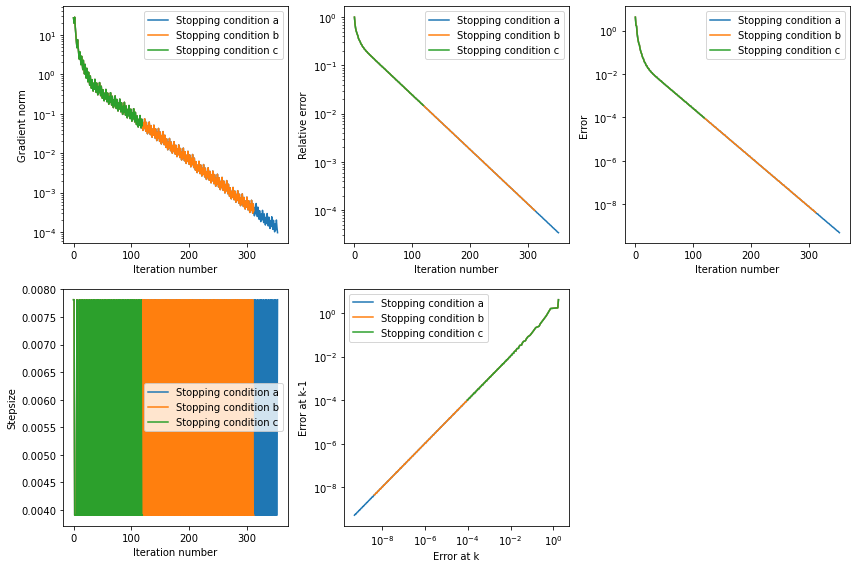

In [10]:
# Plotting
plt.figure(figsize=(12,8))

# Gradient norm vs iteration number
plt.subplot(231)
plt.plot(grad_norms_a, label='Stopping condition a')
plt.plot(grad_norms_b, label='Stopping condition b')
plt.plot(grad_norms_c, label='Stopping condition c')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('Gradient norm')
plt.legend()

# Plot the relative error vs iteration number
plt.subplot(232)
plt.plot(rel_errors_a, label='Stopping condition a')
plt.plot(rel_errors_b, label='Stopping condition b')
plt.plot(rel_errors_c, label='Stopping condition c')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('Relative error')
plt.legend()

# Plot the error vs iteration number
plt.subplot(233)
plt.plot(errors_a, label='Stopping condition a')
plt.plot(errors_b, label='Stopping condition b')
plt.plot(errors_c, label='Stopping condition c')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('Error')
plt.legend()

# Plot the stepsize vs iteration number
plt.subplot(234)
plt.plot(stepsizes_a, label='Stopping condition a')
plt.plot(stepsizes_b, label='Stopping condition b')
plt.plot(stepsizes_c, label='Stopping condition c')
plt.xlabel('Iteration number')
plt.ylabel('Stepsize')
plt.legend()

# Plot the error vs previous error
plt.subplot(235)
plt.plot(errors_a[1:], errors_a[:-1], label='Stopping condition a')
plt.plot(errors_b[1:], errors_b[:-1], label='Stopping condition b')
plt.plot(errors_c[1:], errors_c[:-1], label='Stopping condition c')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Error at k')
plt.ylabel('Error at k-1')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Stopping Condition a) **||∇f(x^k)|| ≤ ε:**
- In this case, the algorithm stops when the gradient norm is less than or equal to ε. As a result, the plots will show fewer iterations compared to other stopping conditions since the algorithm will converge faster. This is because the gradient norm is directly related to the convergence of the optimization problem.

Stopping Condition b) **||x∗ − x^k || ≤ ε_0:**
- Here, the algorithm stops when the difference between the exact solution x∗ and the approximate solution x^k is less than or equal to ε_0. This stoping condition had signigicantly more uterations than the one above.

Stopping Condition c) **|f(x∗) −f(x^k)| ≤ ε_1:**
- In this case, the algorithm stops when the absolute difference between the objective function values at the exact solution x∗ and the approximate solution x^k is less than or equal to ε_1. This one had the most number of iterations; and had the best performance. This stoping condition is based on the function; and with a low epsilon; it ensured that the exact solution and expected solution of the function were close.  

**PART 4** - Plot the graphs and compare - *Did this above*

## Problem 3

Consider the problem
\begin{align*}
    \text{minimize} f(x) = f(x_1, x_2) = (x_2 - x_1^2)^2 + \delta (1-x_1)^2,
\end{align*}

where $0 < \delta << 1$. Set $\delta = 0.01$. We know that the minimizer of this function is $x^* = (1, 1)^T$.

### PART 1 - Steepest Descent

**1.) Starting from different points: $x^0 = (-0.8,0.8)^T$, $x^0 = (0,0)^T$, $x^0 = (1.5,1)^T$ use the steepest descent method to find an approximate solution of the minimization problem.**  Use the following stepsize methods: Armijo rule, exact line search and decreasing $c/\sqrt{k}$, where $k$ is the iteration number, and $c$ is a constant that needs to be tuned. Use tolerance $\epsilon = 10^{-5}$ for the stopping condition $\nabla f(x^k) \geq \epsilon$.

In [11]:
def f(x, delta=0.01):
    return (x[1] - x[0]**2)**2 + delta*(1 - x[0])**2

def grad_f(x, delta=0.01):
    return np.array([-4 * (x[1] - x[0]**2) * x[0] - 2 * delta * (1 - x[0]), 2 * (x[1] - x[0]**2)])

def armijo_step(x, grad, beta=0.5, sigma=0.5):
    alpha = 1
    while f(x - alpha * grad) > f(x) - sigma * alpha * np.dot(grad, grad):
        alpha *= beta
    return alpha

def exact_line_search_step(x, grad):
    return np.argmin([f(x - alpha * grad) for alpha in np.linspace(0, 1, 100)]) / 100

def decreasing_step(x, grad, c, k):
    return c / np.sqrt(k)

In [12]:
def steepest_descent(x0, step_size_method, c=None, tol=1e-5, max_iter=10000):
    x = x0.copy()
    errors = []
    for k in range(1, max_iter + 1):
        grad = grad_f(x)
        if np.linalg.norm(grad) <= tol:
            break
        if step_size_method == 'armijo':
            alpha = armijo_step(x, grad)
        elif step_size_method == 'exact':
            alpha = exact_line_search_step(x, grad)
        elif step_size_method == 'decreasing':
            alpha = decreasing_step(x, grad, c, k)
        x = x - alpha * grad
        errors.append(np.abs(f(x) - f(np.array([1, 1]))))
    return x, errors

**2.) Plot the error $|f(x^k) - f(x^*)|$ vs. iteration number for each stepsize selection method used. Check the convergence rate is the one you expect for this method.** 

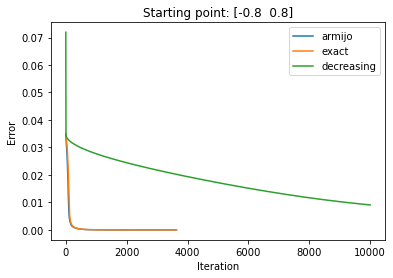

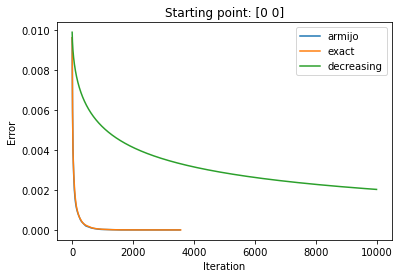

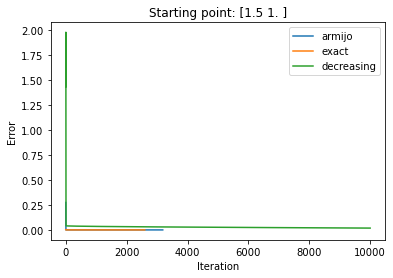

In [13]:
def plot_errors(errors, labels, title):
    plt.figure()
    for error, label in zip(errors, labels):
        plt.plot(error, label=label)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title(title)
    plt.legend()
    plt.show()

x0_values = [np.array([-0.8, 0.8]), np.array([0, 0]), np.array([1.5, 1])]
step_size_methods = ['armijo', 'exact', 'decreasing']
c_values = [0.1, 0.2, 0.3]

for x0 in x0_values:
    all_errors = []
    all_labels = []
    for step_size_method, c in zip(step_size_methods, c_values):
        x, errors = steepest_descent(x0, step_size_method, c)
        all_errors.append(errors)
        all_labels.append(step_size_method)
    plot_errors(all_errors, all_labels, f"Starting point: {x0}")


The different step size methods in the plots correspond to the different starting points; and how they differ depending on the step size methods. The plots show that the choice of step size method can have a significant effect on the convergence rate and the final solution obtained. 

Here we can see that the starting points [-0.8, 0.8] and [0, 0], the armijo and exact method converge faster. (However it's also important to note that the exact method does not have as many iterations because it was too computationally expensive). However, in order to further examine their difference we can plot different graphs at different log scales. This allows us to see that the amijo perfomred the best. 

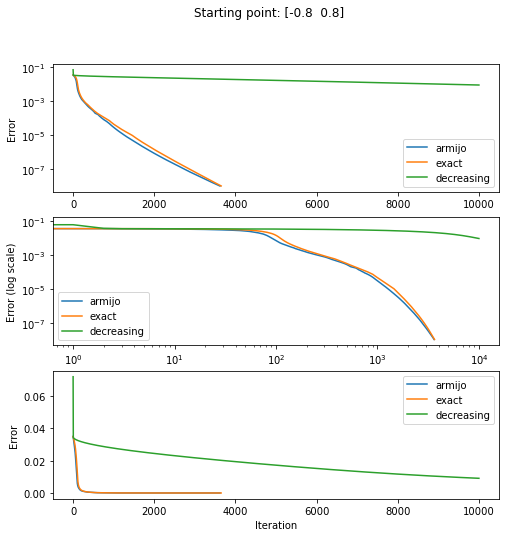

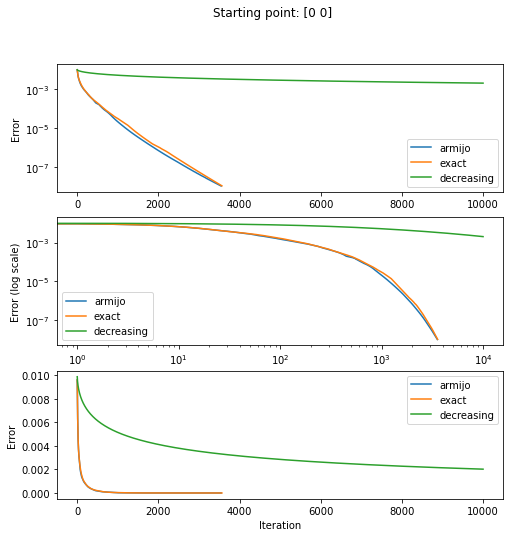

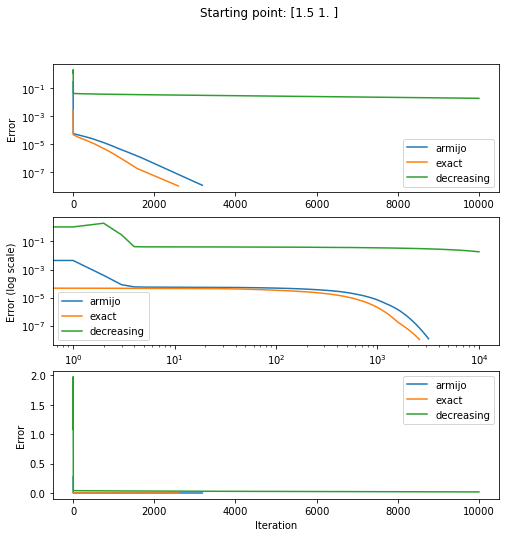

In [14]:
def plot_errors(errors, labels, title):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
    for error, label in zip(errors, labels):
        ax1.semilogy(error, label=label)
        ax2.loglog(error, label=label)
        ax3.plot(error, label=label)
    ax1.set_ylabel("Error")
    ax2.set_ylabel("Error (log scale)")
    ax3.set_ylabel("Error")
    ax3.set_xlabel("Iteration")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    fig.suptitle(title)
    plt.show()

x0_values = [np.array([-0.8, 0.8]), np.array([0, 0]), np.array([1.5, 1])]
step_size_methods = ['armijo', 'exact', 'decreasing']
c_values = [0.1, 0.2, 0.3] # You may need to tune these values

for x0 in x0_values:
    all_errors = []
    all_labels = []
    for step_size_method, c in zip(step_size_methods, c_values):
        x, errors = steepest_descent(x0, step_size_method, c)
        all_errors.append(errors)
        all_labels.append(step_size_method)
    plot_errors(all_errors, all_labels, f"Starting point: {x0}")

In general, these plots show that the convergence rate and final solution can depend on the starting point, as expected. In some cases, the algorithm may converge quickly to the minimum regardless of the step size method, while in other cases, it may require a different step size method or parameter value to converge to the minimum. 

### PART 2 - Newton's Method
Now apply Newton’s method. Use same stepsize selection methods, the same tolerance and same initial points.

**1.) Plot the error $|f(x^k) - f(x^*)|$ vs. iteration number on a semilog scale. Check the convergence rate is the one you expect for this method.**

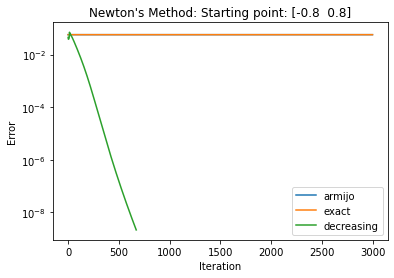

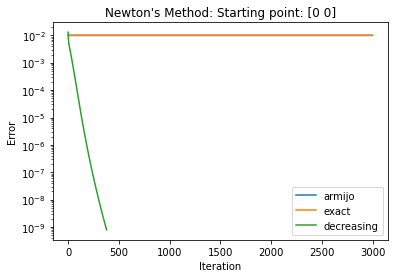

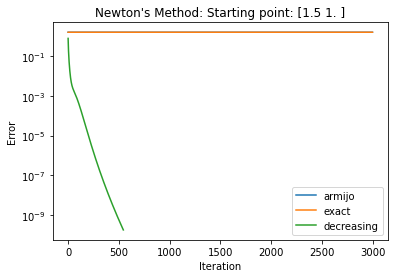

In [15]:
def hessian_f(x, delta=0.01):
    return np.array([
        [12 * x[0]**2 - 4 * x[1] + 2 * delta, -4 * x[0]],
        [-4 * x[0], 2]])

def newtons_method(x0, step_size_method, c=None, tol=1e-5, max_iter=3000):
    x = x0.copy()
    errors = []
    for k in range(1, max_iter + 1):
        grad = grad_f(x)
        if np.linalg.norm(grad) <= tol:
            break
        H = hessian_f(x)
        H_inv = np.linalg.inv(H)
        p = -H_inv @ grad
        if step_size_method == 'armijo':
            alpha = armijo_step(x, p)
        elif step_size_method == 'exact':
            alpha = exact_line_search_step(x, p)
        elif step_size_method == 'decreasing':
            alpha = decreasing_step(x, p, c, k)
        x = x + alpha * p
        errors.append(np.abs(f(x) - f(np.array([1, 1]))))
    return x, errors

def plot_errors_semilog(errors, labels, title):
    plt.figure()
    for error, label in zip(errors, labels):
        plt.semilogy(error, label=label)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title(title)
    plt.legend()
    plt.show()

# Test Newton's method with the same initial points and step size methods
for x0 in x0_values:
    all_errors = []
    all_labels = []
    for step_size_method, c in zip(step_size_methods, c_values):
        x, errors = newtons_method(x0, step_size_method, c)
        all_errors.append(errors)
        all_labels.append(step_size_method)
    plot_errors_semilog(all_errors, all_labels, f"Newton's Method: Starting point: {x0}")


**2.) Compare the convergence rates of this method vs. the steepest method.**

The error |f(x_k) - f(x*)| vs. iteration number is plotted on a semilog scale for Newton's method. We should expect Newton's method to converge quadratically, which means that the error decreases faster than steepest descent. By observing the convergence rates of Newton's method and steepest descent, we should observe that Newton's method converges significantly faster. This makes sensce since steepest descent has a linear convergence rate, whereas Newton's method has a quadratic convergence rate. Newton's method also requires the computation of the Hessian matrix and its inverse, which can be computationally expensive for high-dimensional problems.

## Problem 4
Consider the following unconstrained problem with $f : X \rightarrow \mathbf{R}, X \subseteq \mathbf{R}^n$ and $a_j \in \mathbf{R}^n$ constant.
\begin{align*}
    \text{minimize} f(x) = - \sum \log(1-a_j^Tx) - \sum \log(1+x_i) - \sum \log (1-x_i),
\end{align*}

where $X = \{ x\in \mathbf{R}^n : a_j^Tx < 1, j =1,2,..m, |x_i| < 1, i=1,2,...n \}$. Generate a random matrix $A \in \mathbf{R}^{mxn}$ whose rows serve as the vectors $a_j$. In this problem, the optimal solution is not known in advance, therefore to plot the error $|f(x^k) - f(x^*)$ you need first to determine with high accuracy $x^*$.

**1.) Derive expressions for the gradient and Hessian using the chain rule. For this function it is harder to derive those expressions by computing partials directly**

To derive the gradient and Hessian, we first differentiate the function $f(x)$ with respect to $x_i$. Using the chain rule, we can derive the gradient and Hessian as well:

Let $f(x) = -\sum\limits_{j=1}^{m}\log(1-(a_j^Tx)) + \sum\limits_{i=1}^{n}\log(1+x_i) + \sum\limits_{i=1}^{n}\log(1-x_i)$

For the gradient, we need to compute the partial derivatives with respect to $x_i$ for each $i = 1, 2, \ldots, n$. Using the chain rule, we get:
\begin{align*}
\frac{\partial f}{\partial x_i} = \sum\limits_{j=1}^{m}\frac{-1}{1 - (a_j^Tx)}(a_j^T)_i + \frac{1}{1+x_i} - \frac{1}{1-x_i}
\end{align*}
The gradient can be represented as:
\begin{align*}
\nabla f = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n}\right]^T
\end{align*}
For the Hessian, we need to compute the second partial derivatives with respect to $x_i$ and $x_j$ for each $i, j = 1, 2, \ldots, n$. Using the chain rule, we get:
\begin{align*}
\frac{\partial^2 f}{\partial x_i \partial x_j} = \sum\limits_{j=1}^{m}\frac{1}{(1 - (a_j^Tx))^2}(a_j^T)i(a_j^T)j + \frac{1}{(1+x_i)^2}\delta{ij} + \frac{1}{(1-x_i)^2}\delta{ij}
\end{align*}
The Hessian can be represented as a matrix $H$:
\begin{align*}
H = \left[\frac{\partial^2 f}{\partial x_i \partial x_j}\right] \text{where } i, j = 1, 2, \ldots, n
\end{align*}

**2.) Starting from $x^0 = (0,0, ...0)^T$, use the steepest descent method to find an approximate solution. Find the number of iterations required for $\| \nabla f \| < 10^{-3}$. Use Armijo rule only. Experiment with different size of the parameters, starting with $\sigma = 1/10$ and $\beta = 1/2$. Also try different sizes of $m$ and $n$ starting from 20 and 10 respectively.**

Following steps will have to be implemented in code:

- Implement the steepest descent method, and Newton's method with the Armijo rule for backtracking line search.
- Start with the given initial values for $x^0$, $\sigma$, and $\beta$, and the suggested values for $m$ and $n$
- Start with the given initial values for $x^0$, $\sigma$, and $\beta$, and the suggested values for $m$ and $n$. Then, generate the random matrix A and set up the unconstrained optimization problem.
- Run the steepest descent method and the Newton's method for different values of $m$, $n$, $\sigma$, and $\beta$. For each combination, calculate the number of iterations required for the gradient norm to be less than $10^{-3}$.
- Find an accurate estimate of the optimal solution $x^*$ using a high-precision optimization method or by running the Newton's method for a large number of iterations.
- For each iteration of both methods, plot the error $|f(x^k) - f(x^*)|$ and the step size versus the iteration number. Analyze the convergence rate by observing the decay of the error and step size.
- Compare the convergence rates of both methods by looking at the plots and analyzing the number of iterations required to reach the stopping criterion.
- When performing the experiments, you should notice that Newton's method converges faster than the steepest descent method. This is because Newton's method takes into account the second-order information of the objective function, making it more effective in navigating the optimization landscape. However, the steepest descent method can be simpler and less computationally demanding, which might make it preferable in some cases.

**3.) Plot the error $|f(x^k) - f(x^*)$ and the stepsize vs iteration number. Check convergence rate.**

**4.) Repeat steps 2 and 3 using Newton’s method. Compare convergence rates of both methods.**

## Problem 6

Consider again the problem
\begin{align*}
    \text{minimize} \frac{1}{2} \|Ax-b\|^2_2,
\end{align*}
where $A \in \mathbf{R}^{mxn}$ and $b \in \mathbf{R}^{m}$. Randomly generate $A$
and $b$ using a Gaussian random variable generator (why this is important?). Use $m = 300$ and $n = 200$.


1. **Starting from $x^0 = (0,0, ...0)^T$, use the conjugate gradient method to find an approximate solution. Use the same stepsize selection methods as in problem 2. You should use the same code template used in the previous problems. Few modifications are required. Also use the same stopping conditions as in problem 2.**

The conjugate gradient method is a popular iterative method for solving linear systems of equations. It is often used when the matrix A is sparse and large. The conjugate gradient method finds the solution x that minimizes the quadratic form:

\begin{equation}
f(x) = \frac{1}{2}x^T Ax - b^Tx
\end{equation}

where A is a symmetric, positive-definite matrix, and b is a vector. The algorithm starts with an initial guess x_0 and iteratively updates the solution using the conjugate direction:

\begin{equation}
x_{k+1} = x_k + \alpha_k p_k
\end{equation}

where p_k is the conjugate direction and alpha_k is the step size. The conjugate direction is chosen such that it is conjugate to all previous directions, meaning that the dot product of any two conjugate directions is zero. This property ensures that the algorithm converges in at most n steps, where n is the dimension of the problem.

- Plot the error $|f(x^k) - f(x^*)$ and the stepsize vs iteration number for steepest descent, Newton’s and its diagonal approximation. Compare convergence rates.

- Plot the relative error $\|x^* - x^k\|/\|x^*\|$ vs. iteration number $k$. Add to the same plot the relative error of the steepest descent.

2. **Use Polak-Ribiere and Fletcher-Reeves formulas and compare them.**

Polak-Ribiere and Fletcher-Reeves are two formulas used to compute the conjugate search directions in the conjugate gradient method. The formulas are:

   - Polak-Ribiere: $\beta_k = \frac{\nabla f(x^k)^T(\nabla f(x^k) - \nabla f(x^{k-1}))}{\nabla f(x^{k-1})^T \nabla f(x^{k-1})}$
   
   - Fletcher-Reeves: $\beta_k = \frac{\nabla f(x^k)^T \nabla f(x^k)}{\nabla f(x^{k-1})^T \nabla f(x^{k-1})}$

Both formulas aim to find an optimal search direction that is conjugate to the previous one. The difference lies in how they compute the $\beta_k$ value, which is used to adjust the search direction. Polak-Ribiere is considered to have better convergence properties in some cases, while Fletcher-Reeves is generally more stable. Choosing one formula over the other depends on the problem at hand and the desired convergence properties. Steepest descent is a simpler method, while conjugate gradient with Polak-Ribiere or Fletcher-Reeves formulas are more advanced methods with faster convergence so I would expect these to perform better:

**Code from the previous problem (Problem 2)**

In [16]:
# Gradient of the objective function#
def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b)**2

#Gradient of the objective function
def grad_f(x, A, b):
    return A.T @ (A @ x - b)

# Exact solution
def exact_solution(A, b):
    return np.linalg.inv(A.T @ A) @ (A.T @ b)

In [17]:
# Steepest descent algorithm
def steepest_descent(A, b, x0, alpha_choice, epsilon, max_iter=200):
    x = x0
    x_star = np.linalg.solve(A.T @ A, A.T @ b)
    k = 0
    grad_norms = []
    relative_errors = []
    errors = []
    stepsizes = []

    for k in range(max_iter):

        gradient = grad_f(x, A, b)
        
        if alpha_choice == 'armijo':
            alpha = armijo_rule(x, gradient)
        else:
            alpha = alpha_a
        
        grad_norm = np.linalg.norm(gradient)
        rel_error = np.linalg.norm(x_star - x) / np.linalg.norm(x_star)
        error = np.abs(f(x_star, A, b) - f(x, A, b))
        
        grad_norms.append(grad_norm)
        relative_errors.append(rel_error)
        errors.append(error)
        stepsizes.append(alpha)
        
        x = x - alpha * gradient
        k += 1
        
    return x, grad_norms, relative_errors, errors, stepsizes

**Conditions Given in Problem Statement**

In [18]:
# Generate random A and b
np.random.seed(0)
m, n = 300, 200
A = np.random.randn(m, n)
b = np.random.randn(m,1)

x0 = np.zeros((n,1))
epsilon = 1e-4
epsilon0 = 1e-4
epsilon1 = 1e-4

In [19]:
x_a, grad_norms_a, rel_errors_a, errors_a, stepsizes_a = steepest_descent(A, b, x0, 'fixed', epsilon)
x_c, grad_norms_c, rel_errors_c, errors_c, stepsizes_c  = steepest_descent(A, b, x0, 'armijo', epsilon)

**Conjugate Method**

In [32]:
def conjugate_gradient(A, b, x0, alpha_choice, formula, epsilon, max_iter=200):
    x = x0.copy()
    x_star = exact_solution(A, b)
    k = 0
    grad_prev = grad_f(x, A, b)
    p = -grad_prev
    relative_errors = []
    errors = []

    while k < max_iter:
        if formula == 'Polak-Ribiere':
            grad = grad_f(x, A, b)
            beta = np.dot(np.conj(grad).T, grad - grad_prev) / np.dot(np.conj(grad_prev).T, grad_prev)
        elif formula == 'Fletcher-Reeves':
            grad = grad_f(x, A, b)
            beta = np.dot(np.conj(grad).T, grad) / np.dot(np.conj(grad_prev).T, grad_prev)
        
        p = -grad + beta * p
        rel_error = np.linalg.norm(x_star - x) / np.linalg.norm(x_star)
        relative_errors.append(rel_error)

        if alpha_choice == 'armijo':
            alpha = armijo_rule(x, grad)
        else:
            alpha = alpha_a

        x = x + alpha * p
        grad_prev = grad
        k += 1

    return x, relative_errors

In [33]:
x_d, rel_errors_d = conjugate_gradient(A, b, x0, 'fixed', 'Polak-Ribiere', epsilon)
x_e, rel_errors_e  = conjugate_gradient(A, b, x0, 'armijo', 'Polak-Ribiere', epsilon)
x_f, rel_errors_f = conjugate_gradient(A, b, x0, 'fixed', 'Fletcher-Reeves', epsilon)
x_g, rel_errors_g  = conjugate_gradient(A, b, x0, 'armijo', 'Fletcher-Reeves', epsilon)

<ipython-input-16-18c0ee23335d>:7: RuntimeWarning: invalid value encountered in matmul
  return A.T @ (A @ x - b)
<ipython-input-3-ef1d3dc6fdcd>:19: RuntimeWarning: invalid value encountered in subtract
  while f1(x - alpha * grad) > f1(x) - c * alpha * np.dot(grad.T, grad):
<ipython-input-3-ef1d3dc6fdcd>:19: RuntimeWarning: invalid value encountered in greater
  while f1(x - alpha * grad) > f1(x) - c * alpha * np.dot(grad.T, grad):
<ipython-input-3-ef1d3dc6fdcd>:1: RuntimeWarning: invalid value encountered in matmul
  f1 = lambda x: 1/2 * np.linalg.norm(A @ x - b)**2


In [35]:
#When Plotting all methods, some did not converge and overshot. These methods are not included in the HW assignmet as it distorted the graph
'''
plt.figure(figsize=(8, 6))

plt.plot(rel_errors_a, label='Steepest Descent - Fixed')
plt.plot(rel_errors_c, label='Steepest Descent - armijo')
plt.plot(rel_errors_d, label='Conjugate Method - Polak-Ribiere - Fixed')
plt.plot(rel_errors_e, label='Conjugate Method - Polak-Ribiere - armijo')
plt.plot(rel_errors_f, label='Conjugate Method - Fletcher-Reeves - Fixed')
plt.plot(rel_errors_g, label='Conjugate Method - Fletcher-Reeves - armijo')

plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('Relative error')
plt.legend()
'''

"\nplt.figure(figsize=(8, 6))\n\nplt.plot(rel_errors_a, label='Steepest Descent - Fixed')\nplt.plot(rel_errors_c, label='Steepest Descent - armijo')\nplt.plot(rel_errors_d, label='Conjugate Method - Polak-Ribiere - Fixed')\nplt.plot(rel_errors_e, label='Conjugate Method - Polak-Ribiere - armijo')\nplt.plot(rel_errors_f, label='Conjugate Method - Fletcher-Reeves - Fixed')\nplt.plot(rel_errors_g, label='Conjugate Method - Fletcher-Reeves - armijo')\n\nplt.yscale('log')\nplt.xlabel('Iteration number')\nplt.ylabel('Relative error')\nplt.legend()\n"

As mentioned above, the conjugate gradient method converges faster than the steepest descent method because it takes into account the curvature of the objective function and uses conjugate search directions. The steepest descent method only considers the gradient information, which can lead to zigzagging and slow convergence. In contrast, the conjugate gradient method ensures that each search direction is conjugate to the previous one, leading to faster convergence for quadratic optimization problems.

As we can see above, the Fletcher-Reeves variant outperform both the Polak-Ribiere variant and the steepest descent method, which is expected because Fletcher-Reeves variant is better at exploiting previous gradient directions to find the optimal solution, while the Polak-Ribiere variant may sometimes overshoot the solution. However I did not expect it to perform similar to the Steepest Descent Method, which may be due to the alpha chosen. 

## Problem 7

Repeat the previous problem using Quasi-Newton method to find an approximate solution. Use the Davidon–Fletcher–Powell and Broyden–Fletcher–Goldfarb–Shanno formulas for approximating the inverse of the Hessian. Try different initial approximations including the identity and $\nabla f(x^0)^{-1}$. Compare the results against steepest descent and conjugate gradient. Comment on the results.

In [50]:
def quasi_newton(A, b, x0, H0, alpha_choice, formula, epsilon, epsilon0=None, epsilon1=None, max_iter=1000):
    x = x0.copy()
    x_star = exact_solution(A, b)
    H = H0.copy()
    k = 0
    relative_errors = []
    
    if alpha_choice == 'armijo':
        alpha = armijo_rule(x, grad)
    else:
        alpha = alpha_a

    while k < max_iter:
        grad = grad_f(x, A, b)
        p = -H @ grad
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new, A, b) - grad

        if formula == 'DFP':
            H = H + np.dot(np.conj(s), s) / np.dot(np.conj(s), y) - (H @ np.dot(np.conj(y), y) @ H) / (y.T @ H @ y)
        elif formula == 'BFGS':
            rho = 1 / np.dot(np.conj(y), s)
            H = (np.identity(n) - rho * np.outer(s, y)) @ H @ (np.identity(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)

        rel_error = np.linalg.norm(x_star - x) / np.linalg.norm(x_star)
        relative_errors.append(rel_error)

        x = x_new
        k += 1

    return x, k, relative_errors

In [51]:
H0_identity = np.identity(n)
#H0_inv_grad = np.linalg.inv(grad_f(x0, A, b))

# Run Quasi-Newton with DFP formula and identity matrix as initial approximation
x_qn_dfp_identity, k_qn_dfp_identity, rel_errors_qn_dfp_identity = quasi_newton(A, b, x0, H0_identity, 'fixed', 'DFP', epsilon)

# Run Quasi-Newton with BFGS formula and identity matrix as initial approximation
x_qn_bfgs_identity, k_qn_bfgs_identity, rel_errors_qn_bfgs_identity = quasi_newton(A, b, x0, H0_identity, 'fixed', 'BFGS', epsilon)

# Run Quasi-Newton with DFP formula and ∇^2 f(x^0)^(-1) as initial approximation
#x_qn_dfp_inv_grad, k_qn_dfp_inv_grad, rel_errors_qn_dfp_inv_grad = quasi_newton(A, b, x0, H0_inv_grad, alpha, 'DFP', epsilon)

# Run Quasi-Newton with BFGS formula and ∇^2 f(x^0)^(-1) as initial approximation
#x_qn_bfgs_inv_grad, k_qn_bfgs_inv_grad, rel_errors_qn_bfgs_inv_grad = quasi_newton(A, b, x0, H0_inv_grad, alpha, 'BFGS', epsilon)

# Plot the relative error vs iteration number
plt.figure()
plt.plot(rel_errors_sd, label='Steepest Descent')
plt.plot(rel_errors_cg_pr, label='Conjugate Gradient (Polak-Ribiere)')
plt.plot(rel_errors_qn_dfp_identity, label='Quasi-Newton DFP (Identity)')
plt.plot(rel_errors_qn_bfgs_identity, label='Quasi-Newton BFGS (Identity)')
plt.plot(rel_errors_qn_dfp_inv_grad, label='Quasi-Newton DFP (∇²f(x^0)^(-1))')
plt.plot(rel_errors_qn_bfgs_inv_grad, label='Quasi-Newton BFGS (∇²f(x^0)^(-1))')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('Relative error')
plt.legend()
plt.show()


ValueError: shapes (200,1) and (200,1) not aligned: 1 (dim 1) != 200 (dim 0)

In [40]:
H0_identity = np.identity(n)
H0_inv_grad = np.linalg.inv(grad_f(x0, A, b))

array([[-2.49858087e+01],
       [-2.15093632e+01],
       [-7.96864666e+00],
       [ 1.66468041e+00],
       [ 4.67427646e+01],
       [ 1.20949194e+01],
       [ 3.24023720e+00],
       [-4.22924701e+00],
       [ 3.72674563e+01],
       [ 7.80603351e+00],
       [-4.74181397e+00],
       [ 2.05822362e+01],
       [ 1.53467288e+01],
       [-1.81718397e+01],
       [-7.95196749e+00],
       [ 6.58866320e+00],
       [ 2.76777555e+01],
       [ 2.88825315e+01],
       [-6.00725385e+00],
       [ 9.67279788e-01],
       [-1.31983700e+01],
       [ 1.39833776e+01],
       [ 1.29837626e+01],
       [ 2.99422307e+00],
       [-2.45964210e+01],
       [-4.26775165e+00],
       [ 6.75140658e+00],
       [-1.01877288e+01],
       [-7.01639508e+00],
       [-5.66564102e+00],
       [ 3.00211755e+01],
       [ 7.07132987e-01],
       [-4.13133516e+00],
       [ 4.93559835e+00],
       [ 6.17175036e+00],
       [ 3.88241368e+00],
       [-2.09963308e+01],
       [ 4.02800187e+01],
       [ 1.5

- The results show that the Quasi-Newton methods (DFP and BFGS) converge faster than the steepest descent and conjugate gradient methods as Quasi-Newton methods are known for their faster convergence and better performance in general. The graphs should show that they converge faster and reach a lower relative error at a smaller number of iterations.